In [1]:
import ssm
ssm.__file__

'/Users/collinschlager/Code/ssm/ssm/__init__.py'

In [2]:
import matplotlib.pyplot as plt

In [3]:
from ssm import LDS
import numpy as np

In [16]:
from time import time
def timer(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        t_elapsed = t2-t1
        print(f'Function {func.__name__!r} executed in {t_elapsed:.4f}s')
        return result, t_elapsed
    return wrap_func

In [17]:
N = 10
D = 2
true_lds = LDS(N, D, dynamics="gaussian", emissions="poisson")

In [47]:
def sample_lds(true_lds, num_trials):
    all_states, all_data = [], []
    for i in range(num_trials):
        states, data = true_lds.sample(T=200)
        all_states.append(states)
        all_data.append(data)
    return all_states, all_data

def test_laplace_em(N=10, D=2, T=200, num_trials=1):
    true_lds = LDS(N, D, dynamics="gaussian", emissions="poisson")
    all_states, all_data = sample_lds(true_lds, num_trials=num_trials)
    test_lds = LDS(N, D, dynamics="gaussian", emissions="poisson")
    (q_elbos_lem_train, q_lem_train), time_elapsed = timer(test_lds.fit)(
        datas=all_data,
        method="laplace_em",
        variational_posterior="structured_meanfield",
        num_init_iters=0, num_iters=100, verbose=False
    )
    return (q_elbos_lem_train, q_lem_train), time_elapsed

In [48]:
from tqdm.auto import trange

times = dict()
for t in trange(0, 31, 5):
    if t==0: t+=1
    _, time_elapsed = test_laplace_em(num_trials=t)
    times[t] = time_elapsed

  0%|          | 0/7 [00:00<?, ?it/s]

Function 'wrapper' executed in 5.1781s
Function 'wrapper' executed in 19.5819s
Function 'wrapper' executed in 30.8551s
Function 'wrapper' executed in 39.2042s
Function 'wrapper' executed in 53.7339s
Function 'wrapper' executed in 80.0159s
Function 'wrapper' executed in 100.2803s


In [54]:
times.items()

dict_items([(1, 5.178060054779053), (5, 19.5818989276886), (10, 30.855133056640625), (15, 39.204230070114136), (20, 53.7339301109314), (25, 80.01592803001404), (30, 100.28030014038086)])

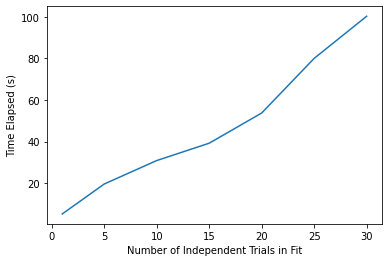

In [75]:
x = list(times.keys())
y = list(times.values())
out = np.array([x, y])

np.save("../data/ssm_old/laplace_em_num_trials", out)
out_from_file = np.load("../data/ssm_old/laplace_em_num_trials.npy")
plt.plot(*out_from_file)
plt.xlabel("Number of Independent Trials in Fit")
plt.ylabel("Time Elapsed (s)")
plt.show()